In [61]:
import cv2
from PIL import Image
from tqdm import tqdm
from glob import glob
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.training import saver
import matplotlib.pyplot as plt

from tqdm import tqdm
import random


In [96]:
def createTrain(path):
    # test_path = "./resource/Test/"
    nub_train = len(glob(path + '/*/*.jpg'))
    #先生成空array，然后往里填每张图片的array
    x_train = np.zeros((nub_train, 600, 360, 3), dtype=np.uint8)
    y_train = np.zeros((nub_train,), dtype=np.uint8)

    i = 0
    for img_path in tqdm(glob(path + '/*/*.jpg')):
        img = Image.open(img_path)
        img = img.resize((360, 600))  #图片resize
        arr = np.asarray(img)  #图片转array
        x_train[j, :, :, :] = arr  #赋值
        typeName = img_path.split('/')[-2]
        # typeName = "castanea"
        if typeName == 'amborella':
            y_train[j] = 0
        elif typeName == 'castanea':
            y_train[j] = 1
        elif typeName == 'convolvulaceae':
            y_train[j] = 2
        elif typeName == 'desmodium':
            y_train[j] = 3
        elif typeName == 'eugenia':
            y_train[j] = 4
        elif typeName == 'laurus':
            y_train[j] = 5
        elif typeName == 'litsea':
            y_train[j] = 6
        elif typeName == 'magnolia':
            y_train[j] = 7
        elif typeName == 'monimiaceae':
            y_train[j] = 8
        elif typeName == 'rubus':
            y_train[j] = 9
        elif typeName == 'ulmus':
            y_train[j] = 10
        i += 1
    return x_train, y_train

In [98]:
train_path = "./resource/TrainMasked/"
x_train, y_train = createTrain(train_path)

100%|██████████| 221/221 [01:21<00:00,  2.72it/s]


In [99]:
train_path2 = "./resource/TrainMasked2/"
x_train2, y_train2 = createTrain(train_path2)

100%|██████████| 83/83 [00:31<00:00,  2.67it/s]


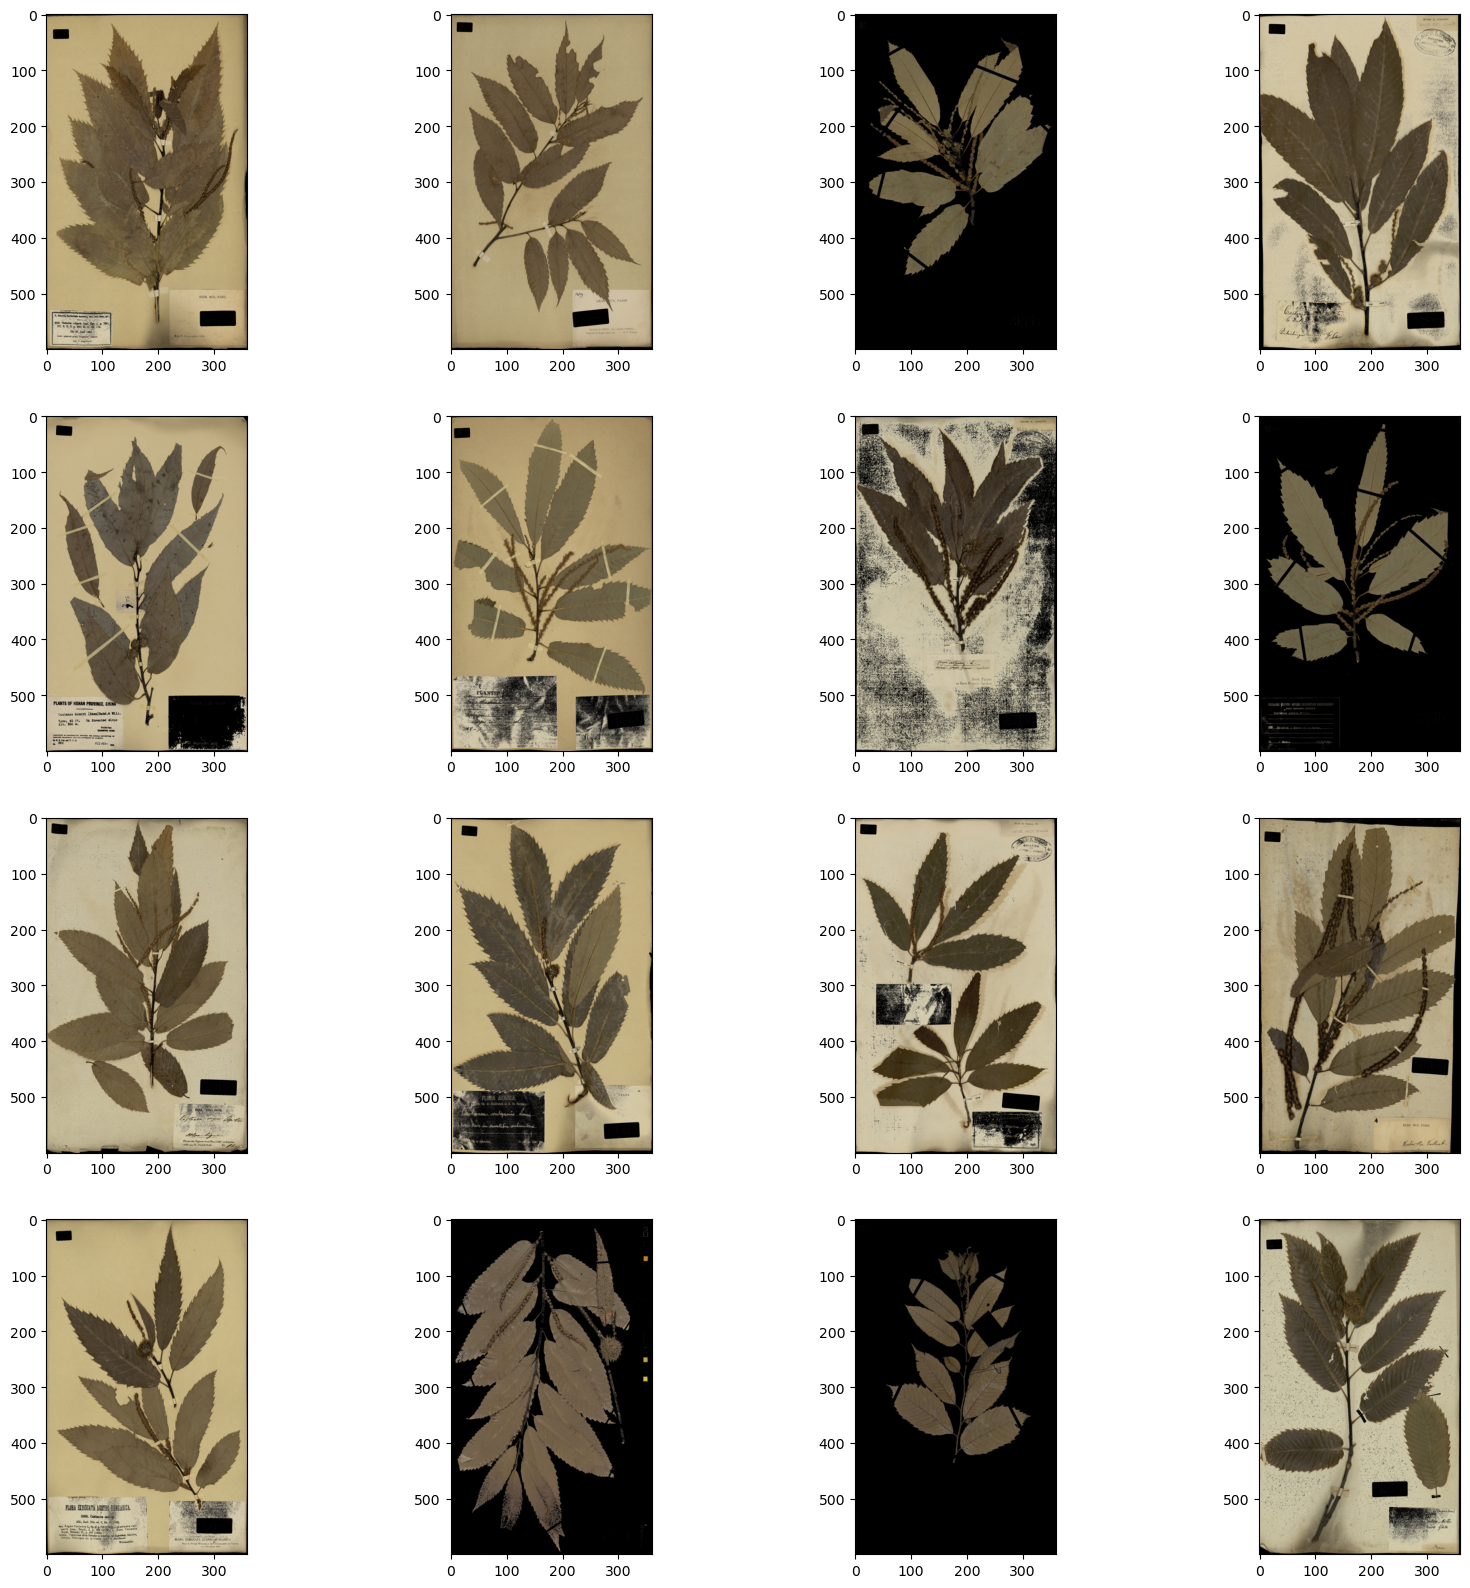

In [64]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

j = 0
for i, img in enumerate(x_train2[:16]):
    axes[i // 4, j % 4].imshow(img)
    j += 1

In [91]:
# Build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[600, 360, 3]),  # input layer
    keras.layers.Dense(64, activation='relu'),  # hidden layer
    keras.layers.Dense(3, activation='softmax')  # output layer
])

model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )


In [94]:
# Train model
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
3/3 [==============================] - 2s 409ms/step - loss: 1.0957 - accuracy: 0.5542
Epoch 2/20
3/3 [==============================] - 1s 387ms/step - loss: 1.0951 - accuracy: 0.5542
Epoch 3/20
3/3 [==============================] - 1s 385ms/step - loss: 1.0942 - accuracy: 0.5542
Epoch 4/20
3/3 [==============================] - 1s 382ms/step - loss: 1.0934 - accuracy: 0.5542
Epoch 5/20
3/3 [==============================] - 1s 371ms/step - loss: 1.0925 - accuracy: 0.5542
Epoch 6/20
3/3 [==============================] - 1s 334ms/step - loss: 1.0919 - accuracy: 0.5542
Epoch 7/20
3/3 [==============================] - 1s 323ms/step - loss: 1.0910 - accuracy: 0.5542
Epoch 8/20
3/3 [==============================] - 1s 346ms/step - loss: 1.0903 - accuracy: 0.5542
Epoch 9/20
3/3 [==============================] - 1s 407ms/step - loss: 1.0895 - accuracy: 0.5542
Epoch 10/20
3/3 [==============================] - 1s 356ms/step - loss: 1.0887 - accuracy: 0.5542
Epoch 11/20
3/3 [==

In [70]:
def createTest(path):
    # test_path = "./resource/Test/"
    nub_test = len(glob(path + '/*/*.jpg'))
    #先生成空array，然后往里填每张图片的array
    x_test = np.zeros((nub_test, 600, 360, 3), dtype=np.uint8)
    y_test = np.zeros((nub_test,), dtype=np.uint8)

    j = 0
    for img_path in tqdm(glob(path + '/*/*.jpg')):
        img = Image.open(img_path)
        img = img.resize((360, 600))  #图片resize
        arr = np.asarray(img)  #图片转array
        x_test[j, :, :, :] = arr  #赋值
        typeName = img_path.split('/')[-2]
        # typeName = "castanea"
        if typeName == 'amborella':
            y_test[j] = 0
        elif typeName == 'castanea':
            y_test[j] = 1
        elif typeName == 'convolvulaceae':
            y_test[j] = 2
        elif typeName == 'desmodium':
            y_test[j] = 3
        elif typeName == 'eugenia':
            y_test[j] = 4
        elif typeName == 'laurus':
            y_test[j] = 5
        elif typeName == 'litsea':
            y_test[j] = 6
        elif typeName == 'magnolia':
            y_test[j] = 7
        elif typeName == 'monimiaceae':
            y_test[j] = 8
        elif typeName == 'rubus':
            y_test[j] = 9
        elif typeName == 'ulmus':
            y_test[j] = 10
        j += 1
    return x_test, y_test

In [ ]:
x_test,y_test = createTest("./resource/TestMasked2/")

In [95]:
# Evaluate model
valid_loss, valid_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Valid loss:{valid_loss}")
print(f"Valid accuracy:{valid_acc}")

2022-12-03 19:47:13.976674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 72ms/step - loss: 1.0848 - accuracy: 0.5000
Valid loss:1.0848321914672852
Valid accuracy:0.5


In [ ]:
# 模型保存，注意：仅仅是多了一个save_format的参数而已
# 注意：这里的'path_to_saved_model'不再是模型名称，仅仅是一个文件夹，模型会保存在这个文件夹之下
model.save('saved_model', save_format='tf')

In [ ]:
# 加载模型，通过指定存放模型的文件夹来加载
# model = keras.models.load_model('saved_model')

In [ ]:
# 看到模型的结构
model.summary()

In [74]:
print(y_test)

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0]


In [80]:
print(x_test.shape)

(38, 600, 360, 3)


In [85]:
# Make one prediction
# x_test,y_test = createTest("./resource/TestMasked/")
# print(y_test)
# class_names = ['amborella', 'castanea', 'convolvulaceae', 'desmodium', 'eugenia', 'laurus', 'litsea', 'magnolia',
#                'monimiaceae', 'rubus', 'ulmus']
class_names = ['amborella', 'castanea', 'convolvulaceae']
y_predicts = model.predict(x_test)

for i in range(0,30):
    y_index = np.argmax(y_predicts[i])
    y_label = class_names[y_index]
    print("Number " , i , " is: ", y_label)

1/2 [==============>...............] - ETA: 0s

2022-12-03 19:44:10.008250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 319ms/step
Number  0  is:  convolvulaceae
Number  1  is:  convolvulaceae
Number  2  is:  convolvulaceae
Number  3  is:  convolvulaceae
Number  4  is:  convolvulaceae
Number  5  is:  convolvulaceae
Number  6  is:  convolvulaceae
Number  7  is:  convolvulaceae
Number  8  is:  convolvulaceae
Number  9  is:  convolvulaceae
Number  10  is:  convolvulaceae
Number  11  is:  convolvulaceae
Number  12  is:  convolvulaceae
Number  13  is:  castanea
Number  14  is:  convolvulaceae
Number  15  is:  convolvulaceae
Number  16  is:  convolvulaceae
Number  17  is:  castanea
Number  18  is:  convolvulaceae
Number  19  is:  convolvulaceae
Number  20  is:  convolvulaceae
Number  21  is:  convolvulaceae
Number  22  is:  convolvulaceae
Number  23  is:  convolvulaceae
Number  24  is:  convolvulaceae
Number  25  is:  convolvulaceae
Number  26  is:  convolvulaceae
Number  27  is:  convolvulaceae
Number  28  is:  convolvulaceae
Number  29  is:  convolvulaceae
